In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [4]:
data=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [5]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

In [7]:
X=data.iloc[:,1:].values
Y=data.iloc[:,0]

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
Xs=StandardScaler()
XS=Xs.fit_transform(X)

In [10]:
X.shape

(42000, 784)

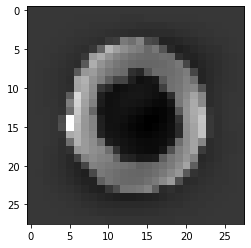

In [11]:
plt.imshow(XS[1].reshape(28,28),cmap="gray")

In [12]:
XS.shape

(42000, 784)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(XS,Y,test_size=0.1)

In [17]:
ytrain

9015     1
11837    7
14502    5
7138     9
18032    4
        ..
721      9
1845     1
36295    6
39292    8
6577     1
Name: label, Length: 37800, dtype: int64

In [18]:
classifier=Sequential()


In [19]:
classifier.add(Dense(units=3000,activation="relu",kernel_initializer='he_uniform',input_dim=784))
classifier.add(Dropout(0.4))

In [20]:
classifier.add(Dense(units=2500,activation="relu",kernel_initializer='he_uniform'))

classifier.add(Dense(units=1000,activation="relu",kernel_initializer='he_uniform'))


classifier.add(Dense(units=750,activation="relu",kernel_initializer='he_uniform'))
classifier.add(Dropout(0.3))

classifier.add(Dense(units=500,activation="relu",kernel_initializer='he_uniform'))
classifier.add(Dropout(0.3))

In [21]:
classifier.add(Dense(units=50,activation="relu",kernel_initializer='he_uniform'))

In [22]:
classifier.add(Dense(units=10,activation="softmax"))

In [23]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3000)              2355000   
_________________________________________________________________
dropout (Dropout)            (None, 3000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2500)              7502500   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              2501000   
_________________________________________________________________
dense_3 (Dense)              (None, 750)               750750    
_________________________________________________________________
dropout_1 (Dropout)          (None, 750)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               3

In [24]:
classifier.compile(optimizer="adamax",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [50]:
model=classifier.fit(xtrain,ytrain,validation_split=0.1,batch_size=1024,epochs=10)

Epoch 1/10
34/34 [==============================] - 24s 713ms/step - loss: 0.0165 - accuracy: 0.9949 - val_loss: 0.1317 - val_accuracy: 0.9735
Epoch 2/10
34/34 [==============================] - 24s 716ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.1246 - val_accuracy: 0.9717
Epoch 3/10
34/34 [==============================] - 24s 716ms/step - loss: 0.0157 - accuracy: 0.9957 - val_loss: 0.1294 - val_accuracy: 0.9714
Epoch 4/10
34/34 [==============================] - 24s 699ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.1370 - val_accuracy: 0.9722
Epoch 5/10
34/34 [==============================] - 24s 706ms/step - loss: 0.0154 - accuracy: 0.9959 - val_loss: 0.1411 - val_accuracy: 0.9712
Epoch 6/10
34/34 [==============================] - 24s 712ms/step - loss: 0.0117 - accuracy: 0.9966 - val_loss: 0.1340 - val_accuracy: 0.9735
Epoch 7/10
34/34 [==============================] - 24s 703ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.1400 - val_accuracy: 0.9712

In [40]:
ytest.iloc[1]

2

In [41]:
yp=classifier.predict(xtest)

In [42]:
ytest.shape

(4200,)

In [43]:
true=0
false=0
for i in range(4200):
    if ytest.iloc[i]==np.argmax(yp[i,:]):
        true +=1
    else:
        false +=1

In [44]:
true

4090

In [45]:
true

4090

In [46]:
true

4090

In [47]:
false

110

In [49]:
4090/(true+false)

0.9738095238095238

In [ ]:
true

In [ ]:
false

In [ ]:
test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")


In [ ]:
X_test=test.values

In [ ]:
yp=classifier.predict(Xs.transform(X_test))

In [ ]:
len(yp)

In [ ]:
np.argmax(yp[2399])

In [ ]:
len(yp)

In [ ]:
plt.imshow(X_test[2399].reshape(28,28))

In [ ]:
ypred=[]
for i in yp:
    ypred.append((np.argmax(i)))

In [ ]:
ypred[:20]

In [ ]:
for k in range(20):
    plt.imshow(X_test[k].reshape(28,28))
    plt.show()

In [ ]:
output=pd.DataFrame(np.arange(1,len(X_test)+1),columns=["ImageId"])

In [ ]:
output["Label"]=ypred

In [ ]:
output

In [ ]:
output.to_csv("final166.csv",index=False)

In [ ]:
test.value_counts()